In [1429]:
import pandas as pd
import numpy as np
import random
import itertools

'''
code for testing 

NOT IMPORTANT!

'''
np.random.seed(37)
random.seed(37)

height = [
    np.random.normal(5.5, 1.0, 100),
    np.random.normal(5.3, 1.0, 200),
    np.random.normal(5.9, 1.0, 300),
    np.random.normal(5.7, 1.0, 200),
    np.random.normal(5.3, 1.0, 400),
    np.random.normal(5.2, 1.0, 500),
    np.random.normal(5.8, 1.0, 300),
    np.random.normal(5.5, 1.0, 200)
]

#height = normal distribution **(HAVE TO BE FETCHED FROM PUMS) 

demographic = [
    ['white', 'minor', 'male'],
    ['white', 'minor', 'female'],
    ['white', 'adult', 'male'],
    ['white', 'adult', 'female'],
    ['other', 'minor', 'male'],
    ['other', 'minor', 'female'],
    ['other', 'adult', 'male'],
    ['other', 'adult', 'female']
]

data = [[{'race': d[0], 'age': d[1], 'gender': d[2], 'height': h} for h in s]
        for d, s in zip(demographic, height)]
data = list(itertools.chain(*data))

df = pd.DataFrame(data)
df.head()

,race,age,gender,height
0,white,minor,male,5.445536
1,white,minor,male,6.174308
2,white,minor,male,5.846647
3,white,minor,male,4.199654
4,white,minor,male,7.018512


#### demographic = cell names for ipf
#### df = generated from cleaned pums data
 

In [1430]:
#import mapped data headers [pums:nhts]
races=['white','black','native','asian','pacific-islander','other']
genders=['male','female']
ages=['child','tenager','young-adult','adult','senior']
educ=['below-high','High-school','college','Bachelor','Graduate']
incomecat=['1','2','3','4','5','6','7','8','9','10','11','0']
# vehs=['1','2','3','0']
nps=['2', '1', '4', '3', '5', '6', '7', '8', '9', '11', '10', '15', '20', '17', '16', '12', '14']

# demographic = [[i, j, k, l, m, a ,b] for i in races for j in ages for k in genders for l in educ for m in incomecat for a in vehs for b in np]
demographic = list(itertools.product(ages,genders,races,incomecat))
demographic
# demographic ready. 

# data = pums

[('child', 'male', 'white', '1'),
 ('child', 'male', 'white', '2'),
 ('child', 'male', 'white', '3'),
 ('child', 'male', 'white', '4'),
 ('child', 'male', 'white', '5'),
 ('child', 'male', 'white', '6'),
 ('child', 'male', 'white', '7'),
 ('child', 'male', 'white', '8'),
 ('child', 'male', 'white', '9'),
 ('child', 'male', 'white', '10'),
 ('child', 'male', 'white', '11'),
 ('child', 'male', 'white', '0'),
 ('child', 'male', 'black', '1'),
 ('child', 'male', 'black', '2'),
 ('child', 'male', 'black', '3'),
 ('child', 'male', 'black', '4'),
 ('child', 'male', 'black', '5'),
 ('child', 'male', 'black', '6'),
 ('child', 'male', 'black', '7'),
 ('child', 'male', 'black', '8'),
 ('child', 'male', 'black', '9'),
 ('child', 'male', 'black', '10'),
 ('child', 'male', 'black', '11'),
 ('child', 'male', 'black', '0'),
 ('child', 'male', 'native', '1'),
 ('child', 'male', 'native', '2'),
 ('child', 'male', 'native', '3'),
 ('child', 'male', 'native', '4'),
 ('child', 'male', 'native', '5'),
 ('ch

In [1431]:
col_list = ["SEX", "RAC1P", "AGEP","SCHL","HINCP","VEH","NP"]
# col_list = ["SEX", "RAC1P", "AGEP","HINCP","SCHL"]
df = pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\pums\\temp_pums.csv", usecols=col_list)
# df = df.rename(columns={'sex': 'gender'})
# df=df[["race", "age", "gender"]]
# np.random.seed(37)
# random.seed(37)
# df['height']=np.random.uniform(size=len(df),low=4.5,high=6.7)
# "C:\Users\abubabu\Documents\GitHub\synthetic-population-simulation\CA-data\pums\temp_pums.csv"
# df['VEH'].value_counts()
# df['NP']=df['NP'].fillna(1)
# df['NP'].isnull().sum()
df.head(5)
# df['HINCP'].isnull().sum()

,AGEP,SCHL,SEX,RAC1P,HINCP,VEH,NP
0,adult,college,female,white,10,3.0,3.0
1,senior,college,male,white,10,3.0,3.0
2,adult,college,male,white,10,3.0,3.0
3,adult,college,female,white,8,1.0,2.0
4,adult,below-high,male,white,8,1.0,2.0


#### cell 66-73 for visualization

In [1432]:
ct = pd.crosstab(df.RAC1P, [df.AGEP, df.SEX])
ct #cross-tabulation of the resulting sampled matrix.

AGEP              adult        child       senior       tenager        \
SEX              female  male female  male female  male  female  male   
RAC1P                                                                   
asian                95    75      7     8     21    10      32    33   
black                73   121     23    16     11    20      58    77   
native              814   836    245   274    325   259     607   654   
other               253   359    142   118     97    83     247   257   
pacific-islander      2     5      3     1      2     4       0     1   
white              7241  7390   1216  1262   6267  5725    2808  3106   

AGEP             young-adult        
SEX                   female  male  
RAC1P                               
asian                     35    31  
black                     19    51  
native                   192   230  
other                     93    79  
pacific-islander           1     4  
white                   1293  1485

In [1433]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_percentage(col):
    global df
    # Count the frequencies of different values in the column
    value_counts = df[col].value_counts()

    # Calculate the percentages
    percentages = (value_counts / len(df)) * 100

    # Create a bar plot of the percentages
    plt.bar(percentages.index, percentages.values)

    # Set the labels and title
    plt.xlabel('Values')
    plt.ylabel('Percentage')
    plt.title('Percentage of '+col+'s in Column')

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

In [1434]:
df.RAC1P.value_counts().sort_index() / df.shape[0]

asian               0.007746
black               0.010470
native              0.099027
other               0.038575
pacific-islander    0.000513
white               0.843669
Name: RAC1P, dtype: float64

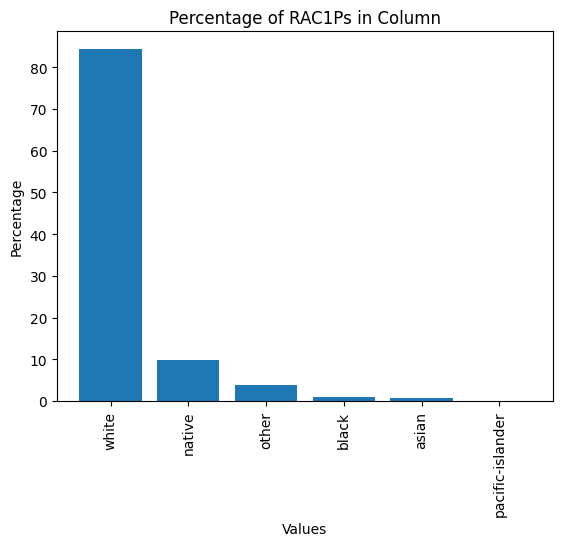

In [1435]:
plot_percentage('RAC1P')

In [1436]:
df.AGEP.value_counts().sort_index() / df.shape[0]

adult          0.385392
child          0.074002
senior         0.286276
tenager        0.175909
young-adult    0.078422
Name: AGEP, dtype: float64

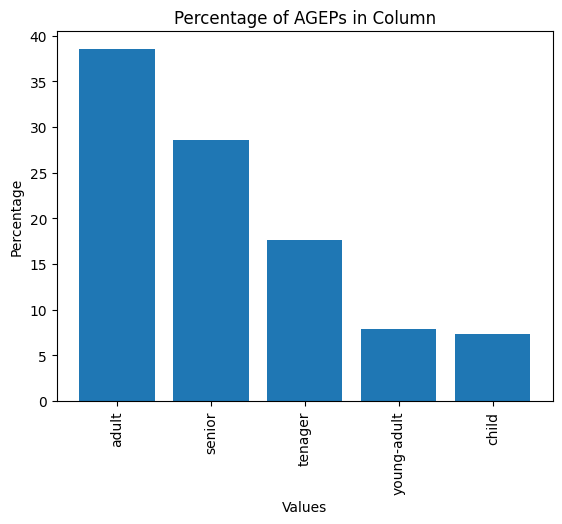

In [1437]:
plot_percentage('AGEP')

In [1438]:
df.SEX.value_counts().sort_index() / df.shape[0]

female    0.496071
male      0.503929
Name: SEX, dtype: float64

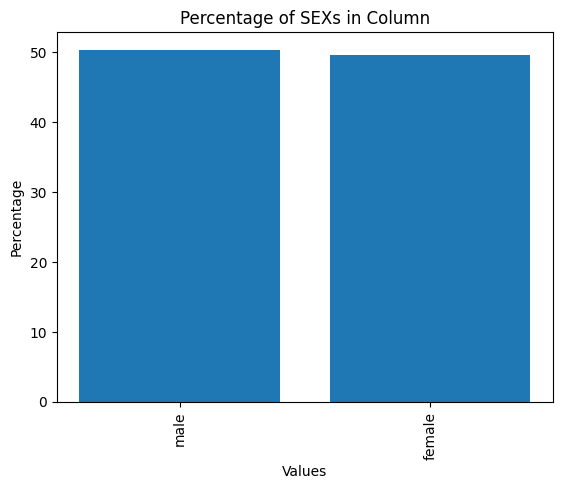

In [1439]:
plot_percentage('SEX')

#### marginal functions

In [1440]:
def get_target_marginals(d):
    factors = list(d.keys())
    targets = [sorted([(k2, v2) for k2, v2 in v.items()]) for k, v in d.items()]
    targets = np.array([[v for _, v in item] for item in targets])
    # print("inside func",type(targets))
    return factors, targets

def get_table(df, targets):
    factors, target_marginals = get_target_marginals(targets)

    cross_tab = pd.crosstab(df[factors[0]], [df[c] for c in factors[1:]])
    # pd.set_option('display.max_columns', None)
    # with open('cross_tabulation.txt', 'w') as file:
    #     file.write(str(cross_tab))
    # cross_tab = pd.crosstab(df[factors[0]], [df[factors[1]],df[factors[2]],df[factors[3]]])
    shape = tuple([df[c].unique().shape[0] for c in factors])
    print(shape)

    table = cross_tab.values.reshape(shape)
    
    return factors, target_marginals, table


In [1441]:
df.head(5)
# df = df.drop("HINCP",axis=1)

,AGEP,SCHL,SEX,RAC1P,HINCP,VEH,NP
0,adult,college,female,white,10,3.0,3.0
1,senior,college,male,white,10,3.0,3.0
2,adult,college,male,white,10,3.0,3.0
3,adult,college,female,white,8,1.0,2.0
4,adult,below-high,male,white,8,1.0,2.0


#### table = contigency table

In [1442]:
# tester
# f, u, X = get_table(df, {
#     'SEX': {'male': 19526298.0, 'female': 19757199.0},
#     'AGEP': {'child': 2451528.0,
#   'tenager': 7608859.0,
#   'young-adult': 2751567.0,
#   'adult': 18748401.0,
#   'senior': 7723142.0},

#  'RAC1P': {'white': 25048942.0,
#   'black': 2766478.0,
#   'native': 762733.0,
#   'asian': 6551732.0,
#   'pacific-islander': 323042.0,
#   'other': 5944874.0},
#   'SCHL': {'below-high': 30337897,
#   'High-school': 114149312,
#   'college': 32431968,
#   'Bachelor': 47075168,
#   'Graduate': 27274058},
    
# })
# print(X)

Loading data from census

In [1443]:
#ddg = demographic_data_groups
ddg=pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\census\\temp_demographic.csv")

ddg

,topic,category,sub-category,id,value
0,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Female,DP05_0089E,12982938.0
1,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",Male,DP05_0088E,12511445.0
2,"CITIZEN, VOTING AGE POPULATION","Citizen, 18 and over population",NaN,DP05_0087E,25494383.0
3,HISPANIC OR LATINO AND RACE,Total population,Hispanic or Latino (of any race),DP05_0071E,15327688.0
4,HISPANIC OR LATINO AND RACE,Total population,Hispanic or Latino (of any race),DP05_0072E,12687312.0
...,...,...,...,...,...
84,SEX AND AGE,Total population,Sex ratio (males per 100 females),DP05_0004E,98.8
85,SEX AND AGE,Total population,Under 18 years,DP05_0019E,9022146.0
86,SEX AND AGE,Total population,Under 5 years,DP05_0005E,2451528.0
87,SEX AND AGE,Total population,NaN,DP05_0001E,39283497.0


In [1444]:
edg=pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\census\\temp_economic.csv")
edg

,topic,category,sub-category,id,value
0,CLASS OF WORKER,Civilian employed population 16 years and over,Government workers,DP03_0048E,2524062
1,CLASS OF WORKER,Civilian employed population 16 years and over,Private wage and salary workers,DP03_0047E,14537772
2,CLASS OF WORKER,Civilian employed population 16 years and over,Self-employed in own not incorporated business...,DP03_0049E,1496268
3,CLASS OF WORKER,Civilian employed population 16 years and over,Unpaid family workers,DP03_0050E,33139
4,CLASS OF WORKER,Civilian employed population 16 years and over,NaN,DP03_0046E,18591241
...,...,...,...,...,...
132,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,All people,Under 18 years,DP03_0130E,(X)
133,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,All people,Under 18 years,DP03_0131E,(X)
134,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,All people,Under 18 years,DP03_0132E,(X)
135,PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME...,All people,Unrelated individuals 15 years and over,DP03_0137E,(X)


In [1445]:
hdg=pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\census\\temp_housing.csv")
hdg

,topic,category,sub-category,id,value
0,BEDROOMS,Total housing units,1 bedroom,DP04_0040E,1901893.0
1,BEDROOMS,Total housing units,2 bedrooms,DP04_0041E,3882434.0
2,BEDROOMS,Total housing units,3 bedrooms,DP04_0042E,4732658.0
3,BEDROOMS,Total housing units,4 bedrooms,DP04_0043E,2427818.0
4,BEDROOMS,Total housing units,5 or more bedrooms,DP04_0044E,608378.0
...,...,...,...,...,...
138,YEAR STRUCTURE BUILT,Total housing units,Built 1990 to 1999,DP04_0020E,1547774.0
139,YEAR STRUCTURE BUILT,Total housing units,Built 2000 to 2009,DP04_0019E,1581294.0
140,YEAR STRUCTURE BUILT,Total housing units,Built 2010 to 2013,DP04_0018E,245999.0
141,YEAR STRUCTURE BUILT,Total housing units,Built 2014 or later,DP04_0017E,243283.0


In [1446]:
sdg=pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\census\\temp_social.csv")
sdg

,topic,category,sub-category,id,value
0,ANCESTRY,Total population,American,DP02_0124E,1190751.0
1,ANCESTRY,Total population,Arab,DP02_0125E,308903.0
2,ANCESTRY,Total population,Czech,DP02_0126E,78798.0
3,ANCESTRY,Total population,Danish,DP02_0127E,159157.0
4,ANCESTRY,Total population,Dutch,DP02_0128E,325780.0
...,...,...,...,...,...
148,YEAR OF ENTRY,Population born outside the United States,Foreign born,DP02_0103E,8969296.0
149,YEAR OF ENTRY,Population born outside the United States,Native,DP02_0098E,544037.0
150,YEAR OF ENTRY,Population born outside the United States,Native,DP02_0099E,114056.0
151,YEAR OF ENTRY,Population born outside the United States,Native,DP02_0100E,429981.0


In [1447]:
edudg=pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\CA-data\\census\\temp_educational.csv")
edudg

,topic,category,sub-category,id,value
0,Female,AGE BY EDUCATIONAL ATTAINMENT,Population 18 to 24 years,S1501_C05_001E,14939973
1,Female,AGE BY EDUCATIONAL ATTAINMENT,Population 18 to 24 years,S1501_C05_001EA,NaN
2,Female,AGE BY EDUCATIONAL ATTAINMENT,Population 18 to 24 years,S1501_C05_001MA,NaN
3,Female,AGE BY EDUCATIONAL ATTAINMENT,Population 18 to 24 years,S1501_C05_002E,1610121
4,Female,AGE BY EDUCATIONAL ATTAINMENT,Population 18 to 24 years,S1501_C05_002EA,NaN
...,...,...,...,...,...
1147,Total,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIO...,"White alone, not Hispanic or Latino",S1501_C01_032EA,NaN
1148,Total,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIO...,"White alone, not Hispanic or Latino",S1501_C01_032MA,NaN
1149,Total,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIO...,"White alone, not Hispanic or Latino",S1501_C01_033E,51420010
1150,Total,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIO...,"White alone, not Hispanic or Latino",S1501_C01_033EA,NaN


#### fetching margin values from demographic data groups 

In [1448]:
temp_race = {'white': 'DP05_0064E', 'black': 'DP05_0065E', 'native': 'DP05_0066E',
             'asian': 'DP05_0067E', 'pacific-islander': 'DP05_0068E', 'other': 'DP05_0069E'}
temp_sex = {'male': 'DP05_0002E', 'female': 'DP05_0003E'}
temp_age = {
    'child': ddg.loc[ddg['id'] == 'DP05_0005E', 'value'].values[0],
    'tenager': ddg.loc[ddg['id'] == 'DP05_0006E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0007E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0008E', 'value'].values[0],
    'young-adult': ddg.loc[ddg['id'] == 'DP05_0009E', 'value'].values[0],
    'adult': ddg.loc[ddg['id'] == 'DP05_0010E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0011E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0012E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0013E', 'value'].values[0],
    'senior': ddg.loc[ddg['id'] == 'DP05_0014E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0015E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0016E', 'value'].values[0]+ddg.loc[ddg['id'] == 'DP05_0017E', 'value'].values[0]
}
temp_inc = {
    '1': int(edg.loc[edg['id'] == 'DP03_0076E', 'value'].values[0]),
    '2': int(edg.loc[edg['id'] == 'DP03_0077E', 'value'].values[0]),
    '3': int(edg.loc[edg['id'] == 'DP03_0078E', 'value'].values[0]),
    '4': int(edg.loc[edg['id'] == 'DP03_0079E', 'value'].values[0]),
    '5': int(edg.loc[edg['id'] == 'DP03_0080E', 'value'].values[0]),
    '6': int(edg.loc[edg['id'] == 'DP03_0081E', 'value'].values[0]),
    '7': int(edg.loc[edg['id'] == 'DP03_0082E', 'value'].values[0]),
    '8': int(edg.loc[edg['id'] == 'DP03_0083E', 'value'].values[0]),
    '9': int(edg.loc[edg['id'] == 'DP03_0084E', 'value'].values[0]),
    '10': int(edg.loc[edg['id'] == 'DP03_0085E', 'value'].values[0]),
    '0': int(edg.loc[edg['id'] == 'DP03_0076E', 'value'].values[0])

}
temp_veh={
    '1' : int(hdg.loc[hdg['id'] == 'DP04_0059E', 'value'].values[0]),
    '2' : int(hdg.loc[hdg['id'] == 'DP04_0060E', 'value'].values[0]),
    '3' : int(hdg.loc[hdg['id'] == 'DP04_0061E', 'value'].values[0]),
    '0' : int(hdg.loc[hdg['id'] == 'DP04_0058E', 'value'].values[0]),
}

temp_np={ #counted from pums
    '2': 13904,
    '1': 7603,
    '4': 7276,
    '3': 5979,
    '5': 5170,
    '6': 2328,
    '7': 1036,
    '8': 424,
    '9': 288,
    '11': 143,
    '10': 120,
    '15': 45,
    '20': 40,
    '17': 34,
    '16': 32,
    '12': 24,
    '14': 14
}
temp_educ={
    'below-high': int(edudg.loc[edudg['id'] == 'S1501_C01_002E', 'value'].values[0])+int(edudg.loc[edudg['id'] == 'S1501_C01_007E', 'value'].values[0])+int(edudg.loc[edudg['id'] == 'S1501_C01_008E', 'value'].values[0]),
    'High-school':int(edudg.loc[edudg['id'] == 'S1501_C01_003E', 'value'].values[0])+int(edudg.loc[edudg['id'] == 'S1501_C01_009E', 'value'].values[0])+int(edudg.loc[edudg['id'] == 'S1501_C01_010E', 'value'].values[0]),
    'college':int(edudg.loc[edudg['id'] == 'S1501_C01_004E', 'value'].values[0])+int(edudg.loc[edudg['id'] == 'S1501_C01_011E', 'value'].values[0]),
    'Bachelor':int(edudg.loc[edudg['id'] == 'S1501_C01_005E', 'value'].values[0])+int(edudg.loc[edudg['id'] == 'S1501_C01_012E', 'value'].values[0]),
    'Graduate':int(edudg.loc[edudg['id'] == 'S1501_C01_013E', 'value'].values[0])
}
margin_dict = {
    'SEX': {key: ddg.loc[ddg['id'] == value, 'value'].values[0] for key, value in temp_sex.items()},
    'AGEP': temp_age,
    # "SCHL":temp_educ,
    'RAC1P': {key: ddg.loc[ddg['id'] == value, 'value'].values[0] for key, value in temp_race.items()},
    # 'HINCP':temp_inc
    # 'VEH': temp_veh,
    # 'NP' : temp_np
}
# ddg.columns
# df = pd.read_csv("CA-data\\pums\\temp_pums.csv", usecols=col_list)
margin_dict


{'SEX': {'male': 19526298.0, 'female': 19757199.0},
 'AGEP': {'child': 2451528.0,
  'tenager': 7608859.0,
  'young-adult': 2751567.0,
  'adult': 18748401.0,
  'senior': 7723142.0},
 'RAC1P': {'white': 25048942.0,
  'black': 2766478.0,
  'native': 762733.0,
  'asian': 6551732.0,
  'pacific-islander': 323042.0,
  'other': 5944874.0}}

In [1449]:
df["HINCP"].unique().shape[0]

11

In [1450]:
f, u, X = get_table(df, margin_dict)

(2, 5, 6)


C:\Users\abubabu\AppData\Local\Temp\ipykernel_11196\78319612.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  targets = np.array([[v for _, v in item] for item in targets])


In [1451]:
X.shape

(2, 5, 6)

In [1452]:
type(X)

numpy.ndarray

In [1453]:
for i in u:
    i=np.array(i)
    print(type(i))
    for j in i :
        print(type(j))

<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


X = contigency table\
u = target marginals\
f = helper vector

In [1454]:
X

array([[[  95,   73,  814,  253,    2, 7241],
        [   7,   23,  245,  142,    3, 1216],
        [  21,   11,  325,   97,    2, 6267],
        [  32,   58,  607,  247,    0, 2808],
        [  35,   19,  192,   93,    1, 1293]],

       [[  75,  121,  836,  359,    5, 7390],
        [   8,   16,  274,  118,    1, 1262],
        [  10,   20,  259,   83,    4, 5725],
        [  33,   77,  654,  257,    1, 3106],
        [  31,   51,  230,   79,    4, 1485]]], dtype=int64)

In [1455]:
def get_coordinates(M):
    return list(itertools.product(*[list(range(n)) for n in M.shape]))

# returns a dict with marginals for each unique value of dimention i in M
def get_marginals(M, i):
    coordinates = get_coordinates(M)
    #print(M)  # M hoilo marginals
    key = lambda tup: tup[0]
    counts = [(c[i], M[c]) for c in coordinates]
    counts = sorted(counts, key=key)
    counts = itertools.groupby(counts, key=key)
    counts = {k: sum([v[1] for v in g]) for k, g in counts}

    return counts

def get_all_marginals(M):
    return np.array([[v for _, v in get_marginals(M, i).items()]
                     for i in range(len(M.shape))])

# returns a dict with counts for each unique value of dimention i in M
def get_counts(M, i):
    coordinates = get_coordinates(M)

    key = lambda tup: tup[0]
    counts = [(c[i], M[c], c) for c in coordinates]
    counts = sorted(counts, key=key)
    counts = itertools.groupby(counts, key=key)
    counts = {k: [(tup[1], tup[2]) for tup in g] for k, g in counts}

    return counts

#ipu to update values 
def update_values(M, i, u):
    marg = get_marginals(M, i)
    vals = get_counts(M, i)
    print("u -> ",type(u) )
    print("marg ->",type(marg))
    for k, v in vals.items():
        for n, c in v:
            if not isinstance(u[k], np.float64):
                print(f"u[k] is not of type numpy.float64 in key '{k}'",type(u[k]), print(u[k]))
            
            if not isinstance(marg[k], np.int64):
                print(f"marg[k] is not of type numpy.int64 in key '{k}'")
            # print("n ->", type(n))
            # print("u[k] ->", type(u[k]))
            # print("marg[k] ->", type(marg[k]))
    d = [[(c, n * u[k] / marg[k]) for n, c in v] for k, v in vals.items()]
    d = itertools.chain(*d)
    d = list(d)

    return d

def ipf_update(M, u):
    for i in range(len(M.shape)):
        values = update_values(M, i, u[i])
        for idx, v in values:
            M[idx] = v

    o = get_all_marginals(M)
    d = get_deltas(o, u)

    return M, d

# o-t
def get_deltas(o, t):
    return np.array([np.linalg.norm(np.array(o[r]) - np.array(t[r]), 2) for r in range(o.shape[0])])


def get_weights(X, max_iters=50, zero_threshold=0.0001, convergence_threshold=3, debug=True):
    M = X.copy()

    d_prev = np.zeros(len(M.shape))
    count_zero = 0

    for _ in range(max_iters):
        M, d_next = ipf_update(M, u)
        d = np.linalg.norm(d_prev - d_next, 2)

        if d < zero_threshold:
            count_zero += 1

        if debug:
            print(','.join([f'{v:.5f}' for v in d_next]), d)
        d_prev = d_next

        # breaks if zero threshold triggered in 3 consecutive run
        if count_zero >= convergence_threshold:
            break

    w = M / M.sum()
    return w

In [1456]:
w = get_weights(X)

u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
1515985.47246,2191528.29633,12.32883 2664771.702502111
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
1499655.32833,1190429.19264,12.76715 1001232.2852360323
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
1495107.08761,1182617.18305,11.18034 9039.579084726
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
1495044.79151,1182401.47989,13.19091 224.52772675530352
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>
marg -> <class 'dict'>
1495043.51903,1182389.79595,12.56981 11.769430447160039
u ->  <class 'list'>
marg -> <class 'dict'>
u ->  <class 'list'>


C:\Users\abubabu\AppData\Local\Temp\ipykernel_11196\886507997.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[v for _, v in get_marginals(M, i).items()]


In [1457]:
w

array([[[0.05177244, 0.01256029, 0.00409879, 0.0256886 , 0.00090401,
         0.14190998],
        [0.00257011, 0.00266662, 0.00083101, 0.00971724, 0.00091432,
         0.01606192],
        [0.00814128, 0.00134606, 0.00116398, 0.00700709, 0.00064344,
         0.08738633],
        [0.01480973, 0.00847473, 0.00259569, 0.02129907, 0.        ,
         0.04673654],
        [0.01095984, 0.00187817, 0.00055525, 0.00542546, 0.00025955,
         0.01456129]],

       [[0.03937835, 0.02005823, 0.00405551, 0.03511896, 0.00217927,
         0.13953469],
        [0.00283025, 0.00178688, 0.00089531, 0.00777943, 0.00029277,
         0.01606009],
        [0.00373457, 0.00235822, 0.00089343, 0.0057764 , 0.00123968,
         0.07690971],
        [0.01471407, 0.01084005, 0.00269456, 0.0213511 , 0.00036891,
         0.04980654],
        [0.00935217, 0.00485741, 0.00064086, 0.00444026, 0.00100133,
         0.01611214]]])

In [1458]:
w.shape

(2, 5, 6)

In [1459]:
# races=['white','black','native','asian','pacific-islander','other']
# genders=['male','female']
# ages=['child','tenager','young-adult','adult','senior']

In [1460]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# array_3d=w
# # Assuming you have a numpy array called 'data' with shape (6, 5, 2)
# # Replace 'data' with the actual name of your array
# column_names = ['male','female']

# # Create row and column index labels
# row_labels = ['white','black','native','asian','pacific-islander','other']
# column_labels = ['child','tenager','young-adult','adult','senior']

# # Create multi-index for rows and columns
# row_index = pd.MultiIndex.from_product([row_labels, column_labels], names=['Race', 'Age'])
# column_index = pd.MultiIndex.from_product([column_names], names=['sex'])

# # Create DataFrame
# weight_df = pd.DataFrame(array_3d.reshape((-1, array_3d.shape[2])), index=row_index, columns=column_index)

# # Display the DataFrame
# weight_df

In [1461]:
# weight_df.shape

In [1462]:
# data=df
# fig, ax = plt.subplots()
# colors = np.random.rand(*data.shape)
# # Create a table from the dataframe
# table = ax.table(cellText=data, cellColours=colors, loc='center')

# # Set the font size and cell padding
# table.set_fontsize(14)
# table.scale(1, 1.5)  # Adjust the scaling if needed
# table.auto_set_column_width(col=list(range(len(data[0]))))  # Auto adjust column width

# # Hide the axes
# ax.axis('off')

# # Show the plot
# plt.show()

In [1463]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming you have a 3D DataFrame named "df"
# # Create a sample 3D DataFrame
# row_labels = ['white','black','native','asian','pacific-islander','other']
# column_labels = ['child','tenager','young-adult','adult','senior']
# value_columns = ['male','female']
# # data = np.random.rand(6, 5, 2)
# # df = pd.DataFrame(data, index=row_labels, columns=column_labels, dtype=float)
# # Plot each depth slice as a heatmap
# fig, axs = plt.subplots(1, df.shape[2], figsize=(12, 4))
# for i in range(df.shape[2]):
#     heatmap = axs[i].imshow(df.iloc[:, :, i], cmap='viridis')
#     axs[i].set_title(f'Depth {i}')
#     axs[i].set_xlabel('Column')
#     axs[i].set_ylabel('Row')
#     plt.colorbar(heatmap, ax=axs[i])

# plt.tight_layout()
# plt.show()

<b> Sampling </b>

In [1464]:
import functools

def get_sampling_weights(df, f, w):
    get_filters = lambda df, fields, values: [df[f] == v for f, v in zip(fields, values)]
    get_total = lambda df, fields, values: df[functools.reduce(lambda a, b: a & b, get_filters(df, fields, values))].shape[0]

    return {k: v / get_total(df, f, k) for k, v in zip(list(itertools.product(*[sorted(df[c].unique()) for c in f])), np.ravel(w))}

def get_samples(df, f, w, n=10_000):
    weights = get_sampling_weights(df, f, w)
    s = df.apply(lambda r: weights[tuple([r[c] for c in f])], axis=1)
    return df.sample(n=n, replace=True, weights=s)

sample_df = get_samples(df, f, w)
sample_df

C:\Users\abubabu\AppData\Local\Temp\ipykernel_11196\671011591.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return {k: v / get_total(df, f, k) for k, v in zip(list(itertools.product(*[sorted(df[c].unique()) for c in f])), np.ravel(w))}


,AGEP,SCHL,SEX,RAC1P,HINCP,VEH,NP
32332,adult,High-school,male,white,8,3.0,3.0
40892,adult,below-high,female,asian,7,3.0,7.0
34835,adult,High-school,male,black,6,2.0,5.0
5924,adult,college,female,asian,4,0.0,4.0
37947,senior,Graduate,female,white,8,2.0,2.0
...,...,...,...,...,...,...,...
43451,adult,college,male,black,10,3.0,16.0
23762,child,below-high,male,white,7,2.0,4.0
538,adult,High-school,male,native,4,1.0,6.0
2001,young-adult,High-school,female,white,4,3.0,3.0


In [1465]:
sample_df.to_csv("sampled_ASGI.csv")

In [1466]:
f

['SEX', 'AGEP', 'RAC1P']

Cross-tabulation of resulting sampled matrix

In [1467]:
# ct = pd.crosstab(sample_df.race, [sample_df.age, sample_df.gender])
ct #cross-tabulation of the resulting sampled matrix.

AGEP              adult        child       senior       tenager        \
SEX              female  male female  male female  male  female  male   
RAC1P                                                                   
asian                95    75      7     8     21    10      32    33   
black                73   121     23    16     11    20      58    77   
native              814   836    245   274    325   259     607   654   
other               253   359    142   118     97    83     247   257   
pacific-islander      2     5      3     1      2     4       0     1   
white              7241  7390   1216  1262   6267  5725    2808  3106   

AGEP             young-adult        
SEX                   female  male  
RAC1P                               
asian                     35    31  
black                     19    51  
native                   192   230  
other                     93    79  
pacific-islander           1     4  
white                   1293  1485

In [1468]:
def plot_percentage_sample(col):
    global sample_df
    # Count the frequencies of different values in the column
    value_counts = sample_df[col].value_counts()

    # Calculate the percentages
    percentages = (value_counts / len(sample_df)) * 100

    # Create a bar plot of the percentages
    plt.bar(percentages.index, percentages.values)

    # Set the labels and title
    plt.xlabel('Values')
    plt.ylabel('Percentage')
    plt.title('Percentage of '+col+'s in Column')

    # Rotate the x-axis labels if needed
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

In [1469]:
# sample_df.race.value_counts().sort_index() / sample_df.shape[0]

In [1470]:
# plot_percentage_sample('race')

In [1471]:
# Plotting the comparison
# plt.figure(figsize=(8, 6))

# plt.scatter(df['race'], sample_df['race'], color='blue', label='Comparison')

# plt.xlabel('Value - DataFrame 1')
# plt.ylabel('Value - DataFrame 2')
# plt.title('Comparison between DataFrame 1 and DataFrame 2')
# plt.legend()

# plt.show()

In [1472]:
# sample_df.age.value_counts().sort_index() / sample_df.shape[0]

In [1473]:
# plot_percentage_sample('age')

In [1474]:
# sample_df.gender.value_counts().sort_index() / sample_df.shape[0]

In [1475]:
# plot_percentage_sample('gender')

In [1476]:
sample_df.to_csv("SAMPLE_DATA.csv",header=True)

marginals remain kind of the same